In [1]:
## Import necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Import the Training Set and the Testing Set

training = pd.read_csv('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Capstone 3 Project/train.csv')
testing = pd.read_csv(('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Capstone 3 Project/test.csv'))

In [3]:
# Inspect the first 5 rows of the dataset

training.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

A few of the columns seem to have binary variables such as 3G, 4G, Touchscreen, Wi-Fi, and Bluetooth.  Lets change the column names to place the columns in a more understandable format.

In [4]:
# Rename the column in a form more understandable to me

training = training.rename(columns={'battery_power':'Battery_Power', 'blue':'Bluetooth', 'clock_speed':'Clock_Speed', 'dual_sim':'Dual_Sim','fc':'Front_Camera', 'four_g':'4G', 'int_memory':'Internal_Memory', 'm_dep':'Mobile_Depth', 'mobile_wt':'Weight', 'n_cores':'#_Cores', 'pc':'MP_Primary_Cam', 'px_height':'Pix_Height', 'px_width':'Pix_Width', 'ram':'RAM', 'sc_h':'Screen_Height', 'sc_w':'Screen_Width', 'talk_time':'Talk_Time', 'three_g':'3G', 'touch_screen':'Touch_Screen', 'wifi':'Wi-Fi', 'price_range':'Price_Range'})

In [5]:
# Check the info of the dataset for the Dtypes and see if there are any missing values

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery_Power    2000 non-null   int64  
 1   Bluetooth        2000 non-null   int64  
 2   Clock_Speed      2000 non-null   float64
 3   Dual_Sim         2000 non-null   int64  
 4   Front_Camera     2000 non-null   int64  
 5   4G               2000 non-null   int64  
 6   Internal_Memory  2000 non-null   int64  
 7   Mobile_Depth     2000 non-null   float64
 8   Weight           2000 non-null   int64  
 9   #_Cores          2000 non-null   int64  
 10  MP_Primary_Cam   2000 non-null   int64  
 11  Pix_Height       2000 non-null   int64  
 12  Pix_Width        2000 non-null   int64  
 13  RAM              2000 non-null   int64  
 14  Screen_Height    2000 non-null   int64  
 15  Screen_Width     2000 non-null   int64  
 16  Talk_Time        2000 non-null   int64  
 17  3G            

The dataset seems to contain only float64 and int64 dtypes.  There are no other objects or datetime64 objects.  Also, every single column seems to contain a value, so there is not much missing information nor is there the need to impute any missing values.

In [6]:
# Execute the describe method on the dataset to gain better insights

training.describe()

Battery_Power  Bluetooth  Clock_Speed     Dual_Sim  Front_Camera  \
count    2000.000000  2000.0000  2000.000000  2000.000000   2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500      4.309500   
std       439.418206     0.5001     0.816004     0.500035      4.341444   
min       501.000000     0.0000     0.500000     0.000000      0.000000   
25%       851.750000     0.0000     0.700000     0.000000      1.000000   
50%      1226.000000     0.0000     1.500000     1.000000      3.000000   
75%      1615.250000     1.0000     2.200000     1.000000      7.000000   
max      1998.000000     1.0000     3.000000     1.000000     19.000000   

                4G  Internal_Memory  Mobile_Depth       Weight      #_Cores  \
count  2000.000000      2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500        32.046500      0.501750   140.249000     4.520500   
std       0.499662        18.145715      0.288416    35.399655     2.287837   
min       0.000000         2.000000      0.100000    80.000000     1.000000   
25%       0.000000        16.000000      0.200000   109.000000     3.000000   
50%       1.000000        32.000000      0.500000   141.000000     4.000000   
75%       1.000000        48.000000      0.800000   170.000000     7.000000   
max       1.000000        64.000000      1.000000   200.000000     8.000000   

       ...   Pix_Height    Pix_Width          RAM  Screen_Height  \
count  ...  2000.000000  2000.000000  2000.000000    2000.000000   
mean   ...   645.108000  1251.515500  2124.213000      12.306500   
std    ...   443.780811   432.199447  1084.732044       4.213245   
min    ...     0.000000   500.000000   256.000000       5.000000   
25%    ...   282.750000   874.750000  1207.500000       9.000000   
50%    ...   564.000000  1247.000000  2146.500000      12.000000   
75%    ...   947.250000  1633.000000  3064.500000      16.000000   
max    ...  1960.000000  1998.000000  3998.000000      19.000000   

       Screen_Width    Talk_Time           3G  Touch_Screen        Wi-Fi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       Price_Range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000  

[8 rows x 21 columns]

Everything in this dataset seems to be okay.  Nothing contained in the dataset seems to be an outlier just yet.  But further investigation is necessary

In [7]:
# See how many rows and columns are contained in this dataset

training.shape

(2000, 21)

In [8]:
# Check to see the amount of null values in the dataset 

training.isnull().sum()

Battery_Power      0
Bluetooth          0
Clock_Speed        0
Dual_Sim           0
Front_Camera       0
4G                 0
Internal_Memory    0
Mobile_Depth       0
Weight             0
#_Cores            0
MP_Primary_Cam     0
Pix_Height         0
Pix_Width          0
RAM                0
Screen_Height      0
Screen_Width       0
Talk_Time          0
3G                 0
Touch_Screen       0
Wi-Fi              0
Price_Range        0
dtype: int64

As expected, there are no missing values and all of the columns seem to contain some type of information within them.  There does not seem to be a need for any data wrangling.

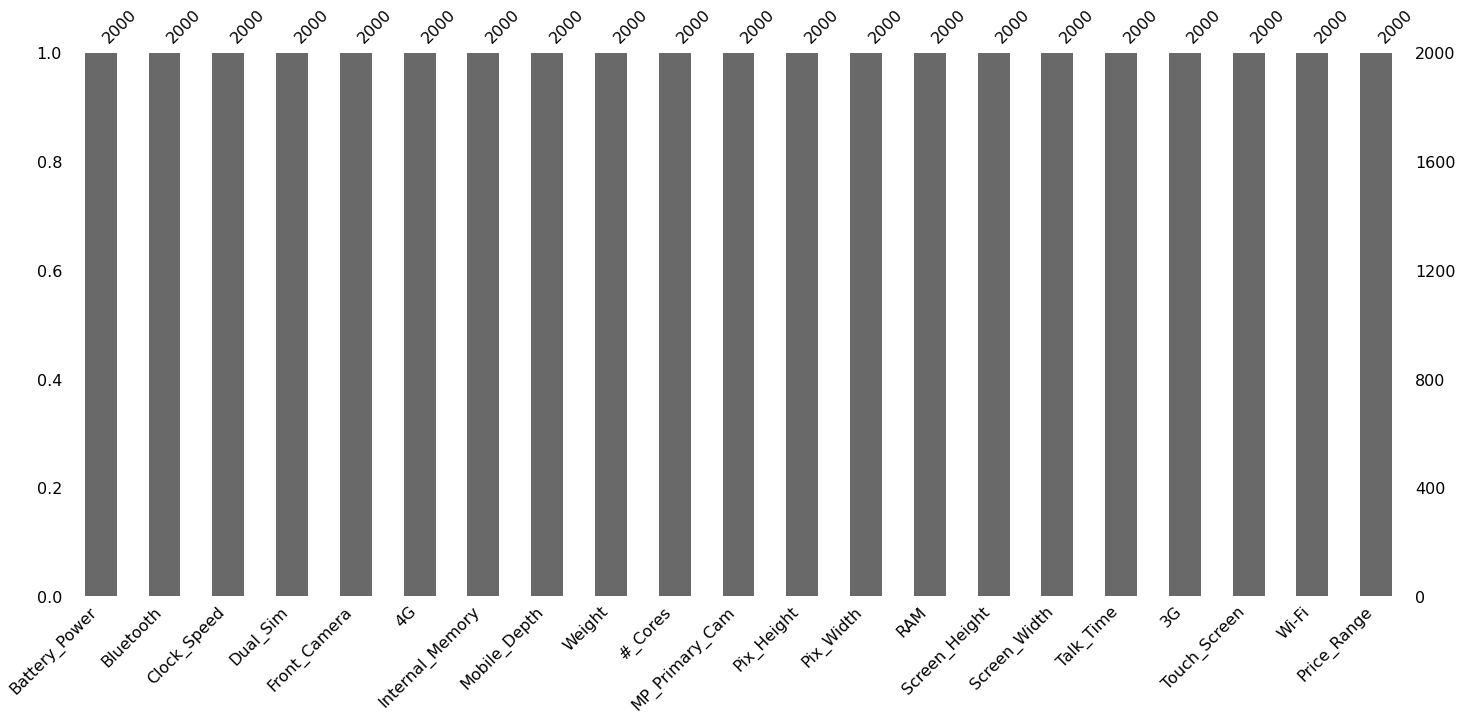

In [9]:
# Create a missingness matrix as a visual for the amount of missing values

msno.bar(training)

In [10]:
# See the amount of data in the dataset for each target category

training['Price_Range'].value_counts()

3    500
2    500
1    500
0    500
Name: Price_Range, dtype: int64

Each category seems to have an equal amount of data.  This is good because it allows the data that we eventually input into the model to be consistent and not skewed.

In [11]:
# Verify the amount of unique values for the target variable

training['Price_Range'].unique()

array([1, 2, 3, 0], dtype=int64)

There are only 4 categories, according to the dataset, for classification.

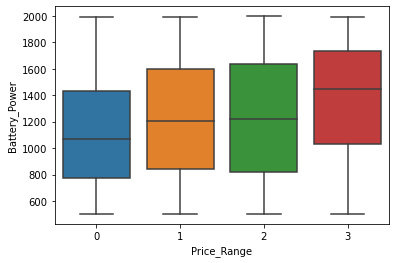

In [12]:
# Create a boxplot of Price Range vs Battery Power

sns.boxplot(x=training['Price_Range'], y=training['Battery_Power'])

There appears to be a relationship between the battery power and the price range.  It seeems that the more expensive phone have better battery life and the less expensive phones have poorer battery life.

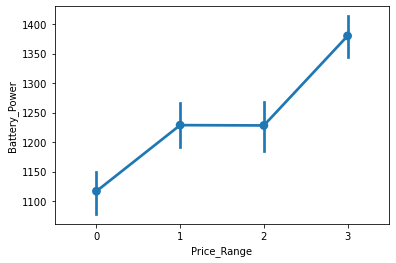

In [13]:
# Create a pointplot of Price Range vs Battery Power

sns.pointplot(x='Price_Range',y='Battery_Power',data=training)

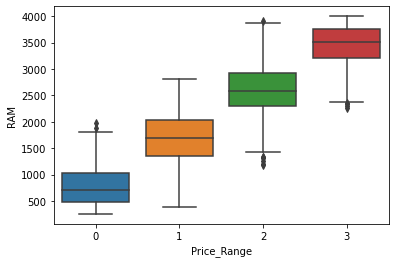

In [14]:
# Create a boxplot of Price Range vs RAM

sns.boxplot(x=training['Price_Range'], y=training['RAM'])

There seems to be a relationship between RAM and price range as well.  The more expensive phones have a higher amount of RAM and the less expensive phones have a lower amount of RAM.

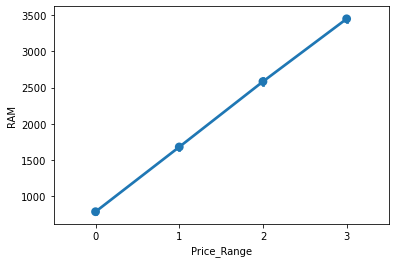

In [15]:
# Create a pointplot of Price Range vs RAM

sns.pointplot(x='Price_Range',y='RAM',data=training)

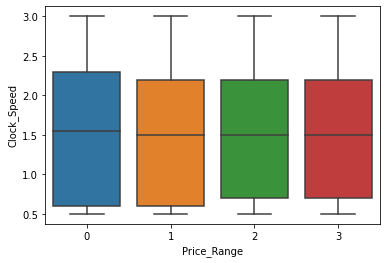

In [16]:
# Create a boxplot of Price Range vs Clock Speed

sns.boxplot(x=training['Price_Range'], y=training['Clock_Speed'])

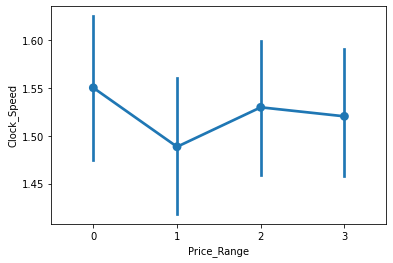

In [30]:
sns.pointplot(x='Price_Range',y='Clock_Speed',data=training)

This seems to be an interesting relationship.  Common sense dictates that the more expensive a phone, the more features it would have and it would perform better than a less expensive phone.  However, according to the plot, the least expensive phones tend to have better clock speeds than the more expensive phones.  The general rule is that higher clock speeds make for faster phones. 

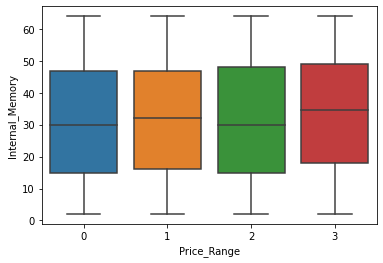

In [17]:
# Create a boxplot of Price Range vs Internal Memory

sns.boxplot(x=training['Price_Range'], y=training['Internal_Memory'])

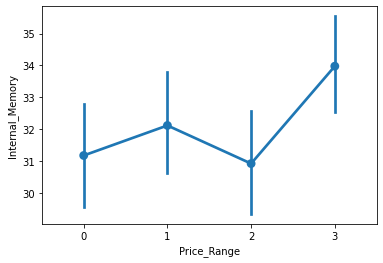

In [31]:
sns.pointplot(x='Price_Range',y='Internal_Memory',data=training)

There does seem to be an identifiable relationship between Internal Memory and Price Range.  Some of the less expensive phones have more Internal Memory than the more expensive phones.  However, it is true that the most expensive phones have the best Internal Memory

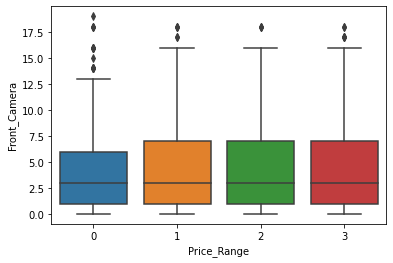

In [18]:
# Create a boxplot of Price Range vs Front Camera

sns.boxplot(x=training['Price_Range'], y=training['Front_Camera'])

The boxplot of Price Range vs Front Camera contains a vew ouliers, but it doesnt seem like there is that many to completely adversely affect the analysis.   Potentially, they may need to be scaled, but maybe not.  We'll cross that bridge when we come ot it

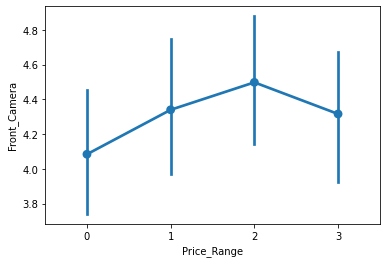

In [32]:
sns.pointplot(x='Price_Range',y='Front_Camera',data=training)

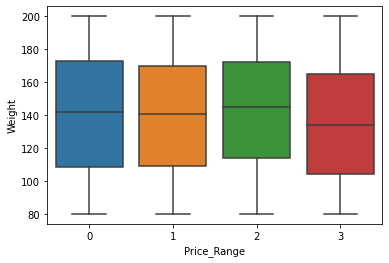

In [19]:
# Create a boxplot of Price Range vs Weight (of phone)

sns.boxplot(x=training['Price_Range'], y=training['Weight'])

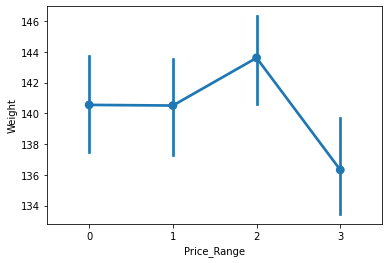

In [33]:
sns.pointplot(x='Price_Range',y='Weight',data=training)

The relationship here is clear.  The most expensive phones tend to weigh the least on the less expensive phones, generally weigh more than the most expensive phones

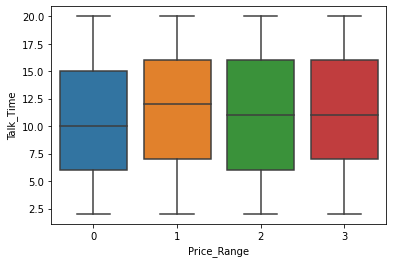

In [20]:
# Create a boxplot of Price Range vs Talk Time

sns.boxplot(x=training['Price_Range'], y=training['Talk_Time'])

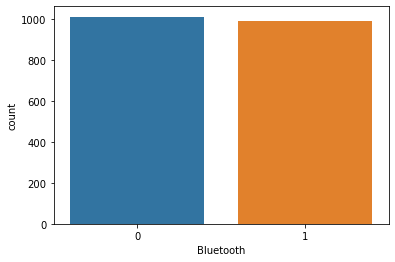

In [21]:
#Create a countplot the phones having bluetooth and the phones that do not have bluetooth

sns.countplot(training['Bluetooth'])

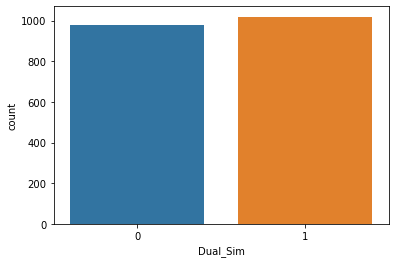

In [22]:
# Create a countplot the phones having Dual SIM capability and the phones that do 
# not have Dual SIM capability

sns.countplot(training['Dual_Sim'])

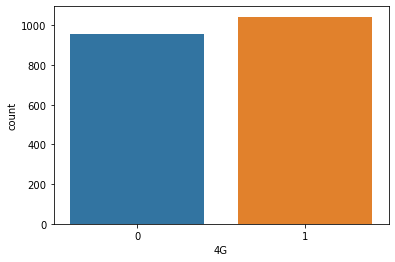

In [23]:
# Create a countplot the phones having 4G capability and the phones that do 
# not have 4G capability

sns.countplot(training['4G'])

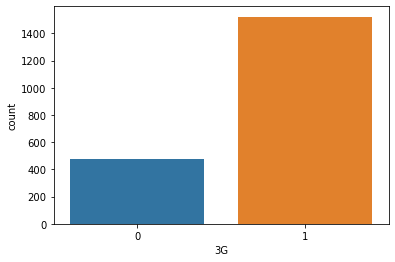

In [24]:
# Create a countplot the phones having 3G capability and the phones that do 
# not have 3G capability

sns.countplot(training['3G'])

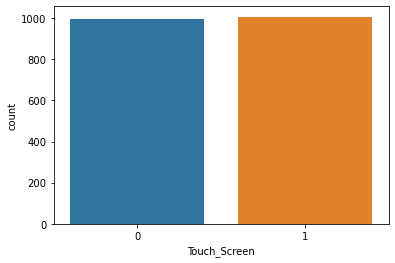

In [25]:
# Create a countplot the phones having Touchscreen capability and the phones that do 
# not have Touchscreen capability

sns.countplot(training['Touch_Screen'])

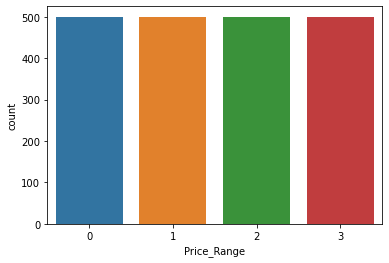

In [26]:
# Create a countplot of Price Range Categories

sns.countplot(training['Price_Range'])

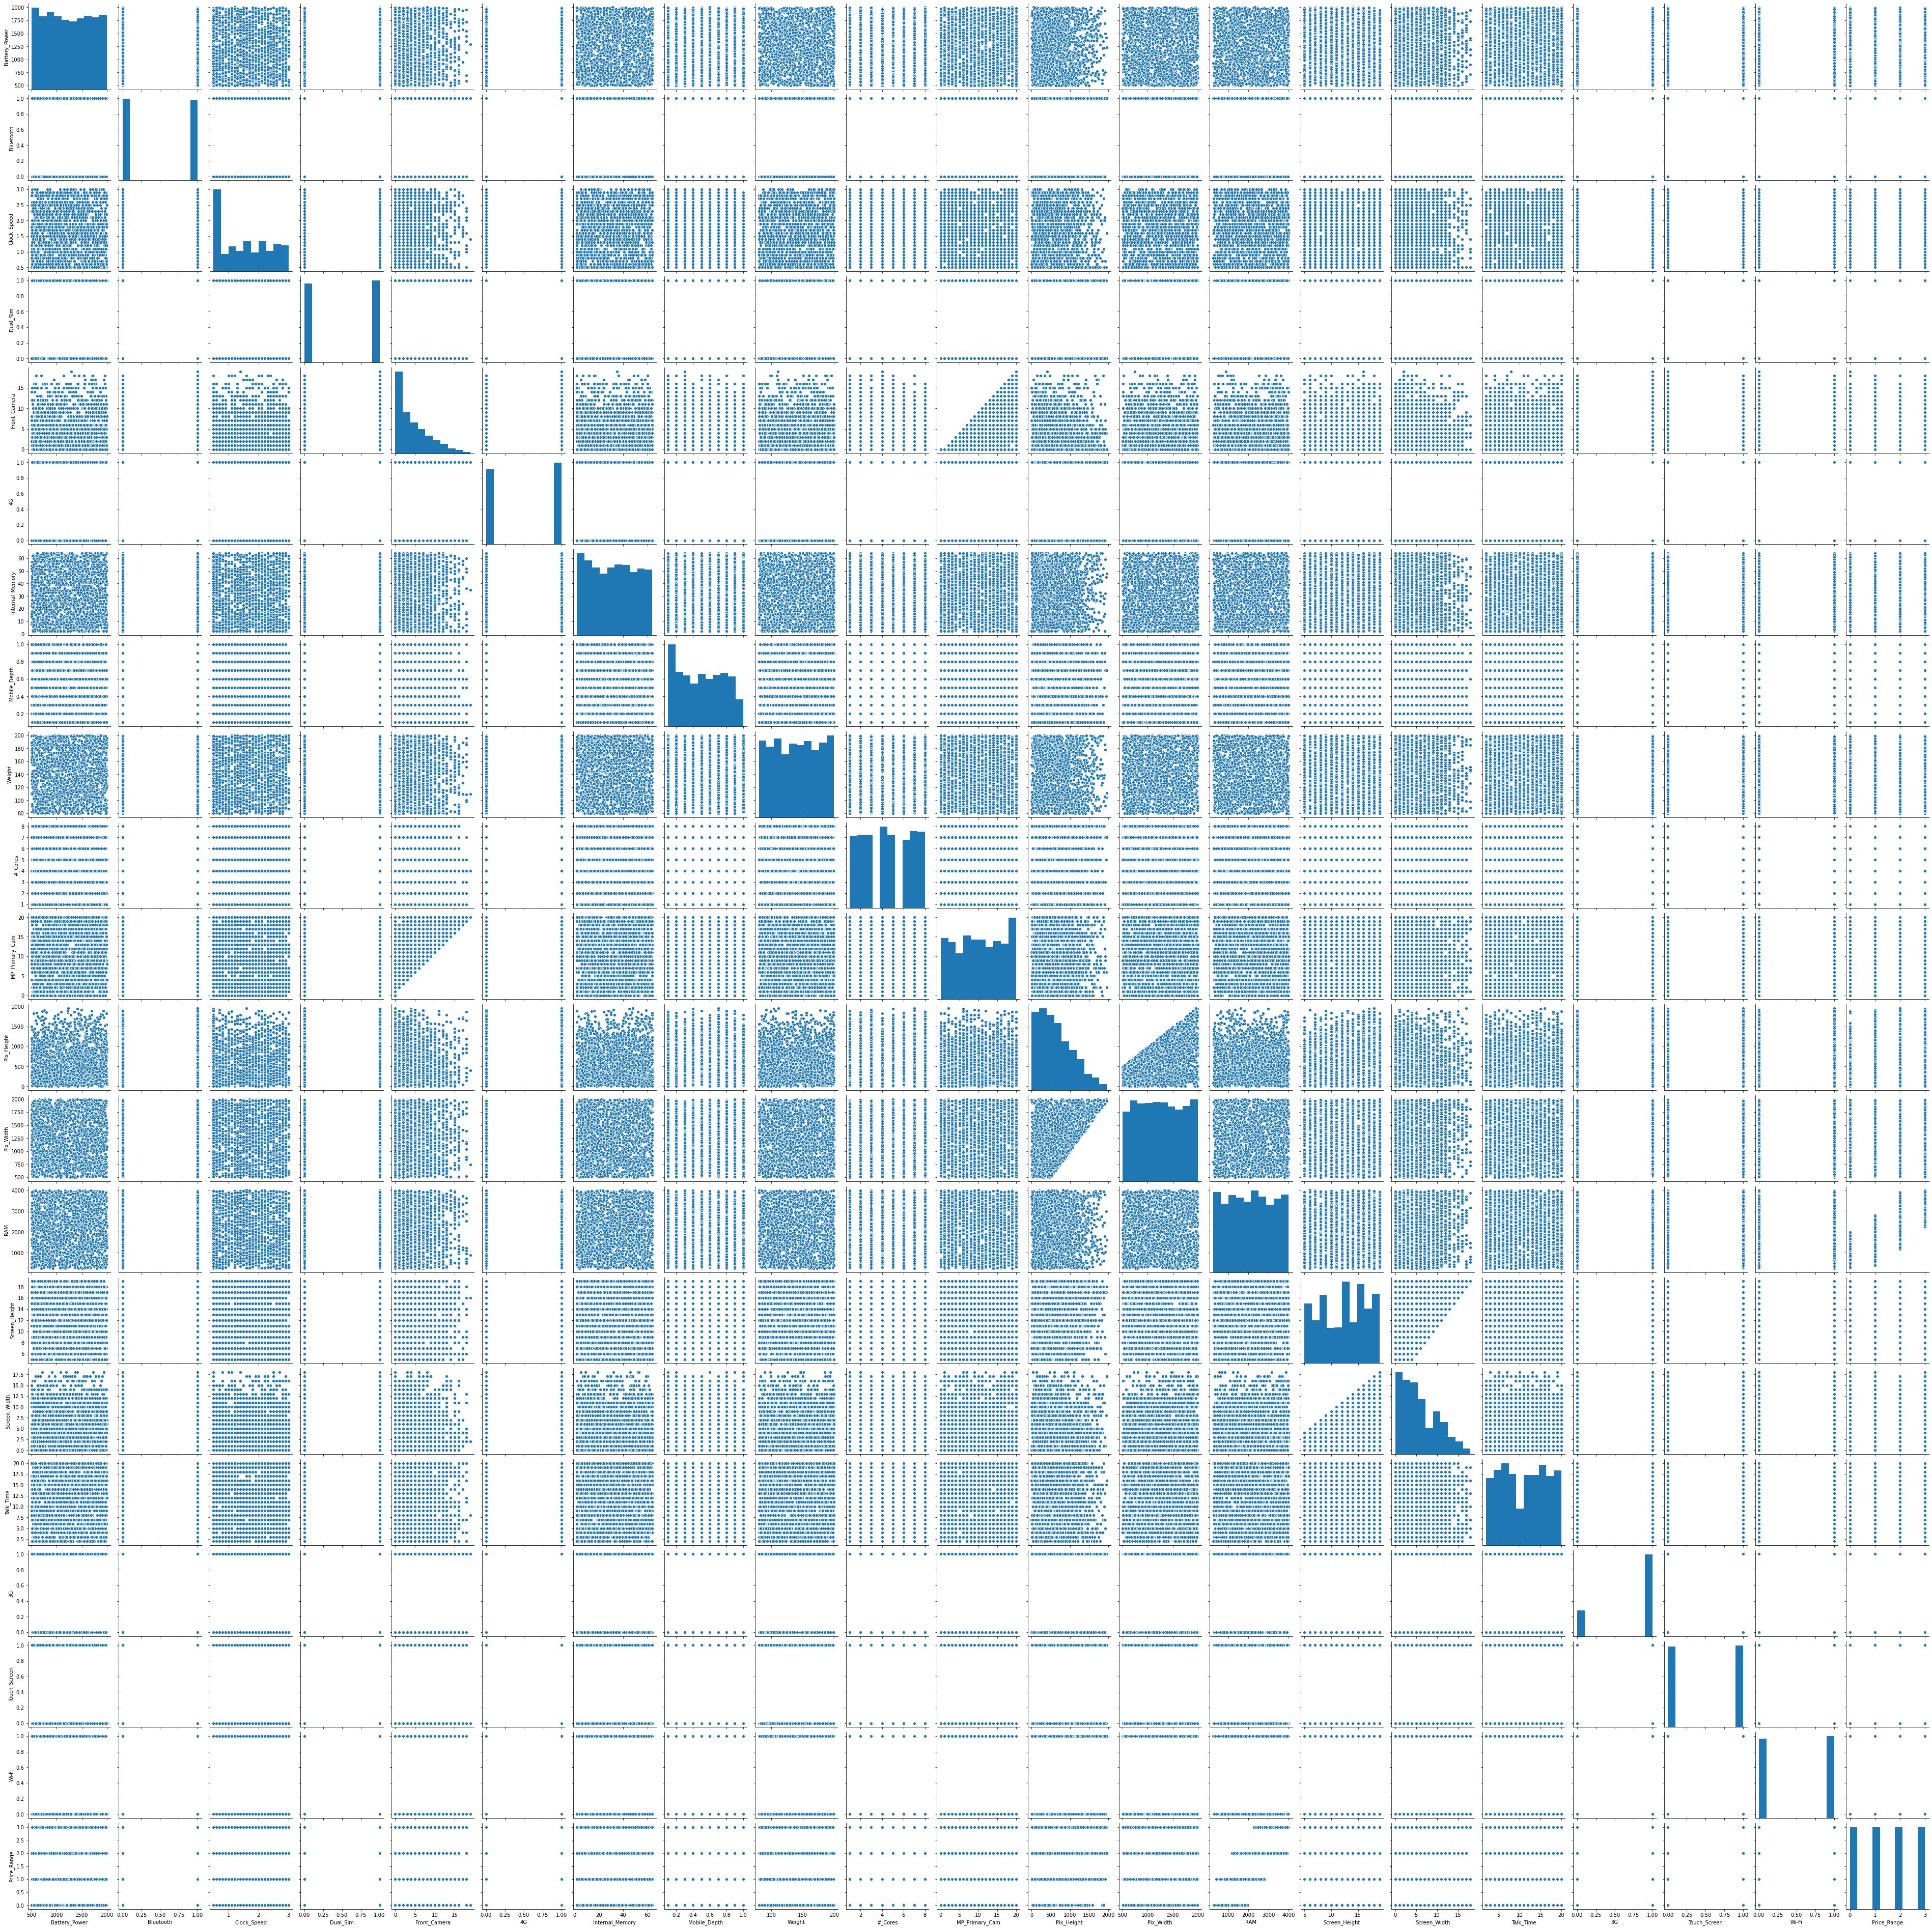

In [27]:
# Create multiple pairplots for the dataframe

sns.pairplot(training)

Text(0.5, 1.0, 'Correlation ')

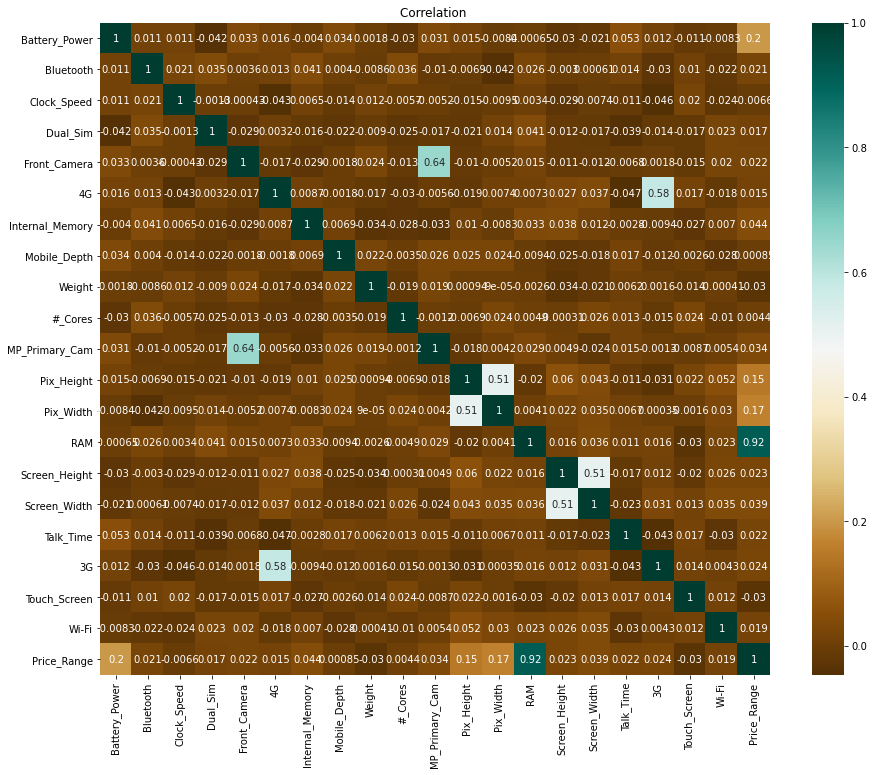

In [28]:
# Create a correlation heatmap to determine which features having positive correlation and
# which features have negative correlation

corr=training.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG', annot=True)
r.set_title("Correlation ")

In [29]:
# Sort the correlated values by the ones that are closely associated with the target 
# in descending order

corr.sort_values(by=["Price_Range"],
                 ascending=False).iloc[0].sort_values(ascending=False)

Price_Range        1.000000
RAM                0.917046
Battery_Power      0.200723
Pix_Width          0.165818
Pix_Height         0.148858
Internal_Memory    0.044435
Screen_Width       0.038711
MP_Primary_Cam     0.033599
3G                 0.023611
Screen_Height      0.022986
Front_Camera       0.021998
Talk_Time          0.021859
Bluetooth          0.020573
Wi-Fi              0.018785
Dual_Sim           0.017444
4G                 0.014772
#_Cores            0.004399
Mobile_Depth       0.000853
Clock_Speed       -0.006606
Weight            -0.030302
Touch_Screen      -0.030411
Name: Price_Range, dtype: float64